In [338]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
#imputer to handle missing data 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
# handle categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#regression librarry
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
#o check accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
# to check accuracy
from sklearn.metrics import *

import pickle 
import os, sys
import csv

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [339]:
#load dataset
dataset=pd.read_csv("Position_Salaries.csv")

In [340]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [341]:
dataset.columns


Index(['Position', 'Level', 'Salary'], dtype='object')

In [342]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [343]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [344]:
dataset.shape

(10, 3)

In [345]:
dataset.sample()

,Position,Level,Salary
8,C-level,9,500000


In [346]:
#handling missing data
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [347]:
dataset.duplicated().sum()

0

In [348]:
dataset=dataset[['Level','Salary']]
dataset.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [349]:
dataset.min()

Level         1
Salary    45000
dtype: int64

In [350]:
train,test=train_test_split(dataset,test_size=0.20,random_state=0)

In [351]:
train.shape,test.shape

((8, 2), (2, 2))

In [352]:
#convert test data into test.csv file
test.to_csv("test.csv",index=False,encoding='utf-8')

In [353]:
train_data,cv_data=train_test_split(train,test_size=0.30,random_state=0)

In [354]:
train_data.shape,cv_data.shape

((5, 2), (3, 2))

In [355]:
#to remove the last column in a dataset
x_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values

In [356]:
x_train.shape,y_train.shape

((5, 1), (5,))

In [357]:
x_cv=cv_data.iloc[:,:-1].values
y_cv=cv_data.iloc[:,1].values

In [358]:
x_cv.shape,y_cv.shape

((3, 1), (3,))

In [359]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [360]:
x_cv=sc.transform(x_cv)

In [361]:

# # fitting simple linear regression model to the training dataset
lin_reg = LinearRegression(normalize=True)  
lin_reg.fit( x_train, y_train)  

# fitting polynomial regression model to the training dataset
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)
# fit into multiple Linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [362]:
#predicting the train set results
y_predict=lin_reg2.predict(poly_reg.fit_transform(x_train))
pd.DataFrame({'Actual':y_train,'Predicated':y_predict})

,Actual,Predicated
0,150000,146571.428571
1,200000,202285.714286
2,110000,112285.714286
3,80000,79428.571429
4,300000,299428.571429


In [363]:
# getting predictions on cross validation dataset
y_pred = lin_reg2.predict(poly_reg.fit_transform(x_cv))
pd.DataFrame({'Actual':y_cv,'Predicated':y_pred})

,Actual,Predicated
0,45000,-210571.428571
1,50000,-62000.000000
2,1000000,698000.000000


In [364]:
acc_train=r2_score(y_train,y_predict)*100
print("Accuracy of train data =",acc_train)

acc_cv=r2_score(y_cv,y_pred)*100
print("Accuracy of cross validation data =",acc_train)




Accuracy of train data = 99.92350353796137
Accuracy of cross validation data = 99.92350353796137


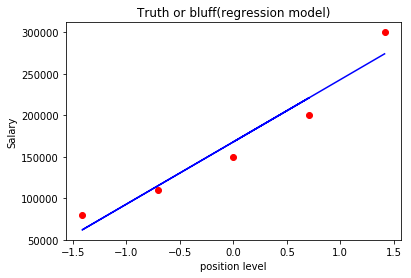

In [365]:
# visualizing the training set result
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lin_reg.predict(x_train),color='blue')
plt.title('Truth or bluff(regression model)')
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()


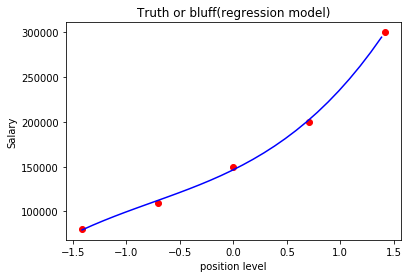

In [366]:
#visualising the regression results for higher resolution and smother curve
x_grid=np.arange(min(x_train),max(x_train),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x_train,y_train,color='red')
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('Truth or bluff(regression model)')
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()

In [367]:
# # fitting simple linear regression model to the training dataset
lin_reg = LinearRegression(normalize=True)  
lin_reg.fit( x_cv, y_cv)  

# fitting polynomial regression model to the training dataset
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x_cv)
# fit into multiple Linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_cv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

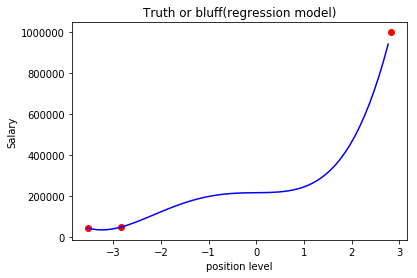

In [368]:
#visualising the regression results for higher resolution and smother curve
x_grid=np.arange(min(x_cv),max(x_cv),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x_cv,y_cv,color='red')
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('Truth or bluff(regression model)')
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()

In [369]:
fileObject = open("train_data.pkl",'wb')
pickle.dump(poly_reg,fileObject)   
# here we close the fileObject
pickle.dump(lin_reg2,fileObject)
fileObject.close()
